In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

IMPORT DATA

In [349]:
df = pd.read_excel('../dataset/dataset.xlsx', sheet_name=0)

In [350]:
df

,Sr.No.,Course,Job profession,Student,Linguistic,Musical,Bodily,s/p,P1,P2,P3
0,1.0,NaN,Astronomer\n,S1,11,5,12,s1,AVG,POOR,AVG
1,NaN,NaN,Astronomer\n,S2,12,6,12,s2,AVG,POOR,AVG
2,NaN,NaN,Astronomer\n,S3,13,7,12,s3,AVG,POOR,AVG
3,NaN,NaN,Astronomer\n,S4,14,8,12,s4,AVG,POOR,AVG
4,NaN,NaN,Astronomer\n,S5,13,9,12,s5,AVG,POOR,AVG
...,...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,Marine Biologist\n,S146,6,5,12,s146,POOR,POOR,AVG
146,NaN,NaN,Marine Biologist\n,S147,8,6,14,s147,POOR,POOR,AVG
147,NaN,NaN,Marine Biologist\n,S148,7,7,12,s148,POOR,POOR,AVG
148,NaN,NaN,Marine Biologist\n,S149,6,8,13,s149,POOR,POOR,AVG


VISUALZATION DATA

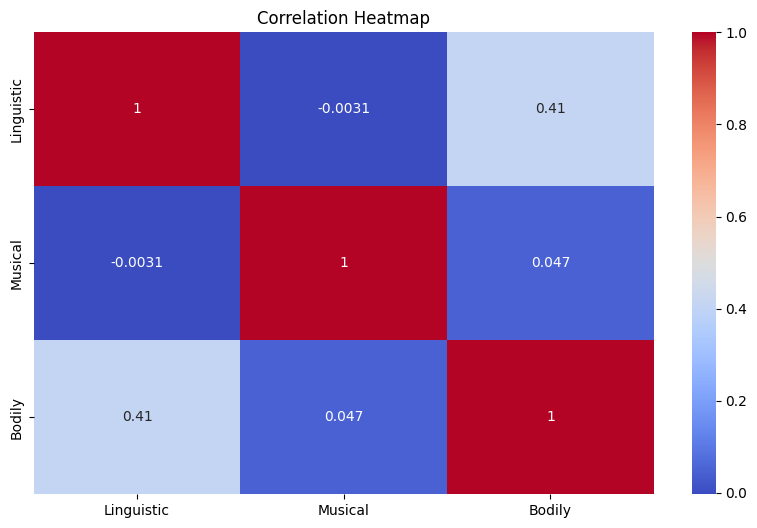

In [351]:
import seaborn as sns

corr = df.drop(columns=[
    'Sr.No.', 
    'Course', 
    'Job profession', 
    'Student',
    's/p',
    'P1',
    'P2',
    'P3',]).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

HOLDING DATA

In [352]:
# X = df.drop(list(df.columns[0:4]) + ['s/'], axis=1)
# X = df.drop(list(df.columns[0:4]) + list(df.columns[12:]), axis=1)
X = df.drop(list(df.columns[0:8]), axis=1)
X

,P1,P2,P3
0,AVG,POOR,AVG
1,AVG,POOR,AVG
2,AVG,POOR,AVG
3,AVG,POOR,AVG
4,AVG,POOR,AVG
...,...,...,...
145,POOR,POOR,AVG
146,POOR,POOR,AVG
147,POOR,POOR,AVG
148,POOR,POOR,AVG


ENCODE FOR ONE - HOT

In [353]:
import pandas as pd
import numpy as np

def one_hot_encode(df_input, columns_to_encode, valid_categories):
    """
    对指定的 DataFrame 列进行手动 One-Hot 编码。

    参数:
        df_input (pd.DataFrame): 原始数据的 DataFrame。
        columns_to_encode (list): 需要进行 One-Hot 编码的列名列表。

    返回:
        pd.DataFrame: 返回一个新的 DataFrame, 其中指定的列已完成 One-Hot 编码，未编码的列保持原样。
    """
    df_encoded = df_input.copy() # 创建一个副本，以避免修改原始 DataFrame
    all_new_columns = [] # 用于存储每个已编码列的 DataFrame 列表

    for col_name in columns_to_encode:
        if col_name not in df_encoded.columns:
            continue

        unique_categories = df_encoded[col_name].unique()
        # 对类别进行排序，以确保新生成的列顺序一致（如有需要）
        # 例如：['AVG', 'BEST', 'POOR'] 可以重新排序
        unique_categories = [cat for cat in df_encoded[col_name].unique() if cat in valid_categories]
        sorted_categories = sorted(unique_categories)

        # 为当前类别新生成的列创建临时 DataFrame
        col_encoded_df = pd.DataFrame(index=df_encoded.index)

        for category in sorted_categories:
            new_col_name = f"{col_name}_{category}"
            # 将原始值与类别匹配则赋值为1，否则赋值为0
            col_encoded_df[new_col_name] = (df_encoded[col_name] == category).astype(int)
        
        all_new_columns.append(col_encoded_df)
    
    # 移除已进行编码的原始列（df_encoded 中的这些列）
    df_encoded = df_encoded.drop(columns=columns_to_encode)
    
    # 将已编码的新列拼接到原始 DataFrame
    # 使用 pd.concat 将已编码的 DataFrame 与剩余的 df_encoded 拼接起来
    if all_new_columns: # 确保有新列可以拼接
        df_encoded = pd.concat([df_encoded] + all_new_columns, axis=1)

    return df_encoded

In [ ]:
cols_to_encode = ['P1', 'P2', 'P3']
valid_categories = ['AVG', 'BEST', 'POOR', 'NA']
X_encoded = one_hot_encode(X, cols_to_encode, valid_categories)
X_encoded.shape
X_encoded

,P1_AVG,P1_POOR,P2_POOR,P3_AVG,P3_BEST
0,1,0,1,1,0
1,1,0,1,1,0
2,1,0,1,1,0
3,1,0,1,1,0
4,1,0,1,1,0
...,...,...,...,...,...
145,0,1,1,1,0
146,0,1,1,1,0
147,0,1,1,1,0
148,0,1,1,1,0


In [208]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_preprocessing = encoder.fit_transform(X)
X_encoded_preprocessing

array([[1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0.

In [209]:
y = df['Job profession'].values
y

array(['Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Astronomer\n', 'Astronomer\n',
       'Astronomer\n', 'Astronomer\n', 'Geologist', 'Geologist',
       'Geologist', 'Geologist', 'Geologist', 'Geologist', 'Geologist',
       'Geo

In [211]:
unique_jobs, y_encoded =  np.unique(y, return_inverse=True)
y_encoded, unique_jobs

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['Astronomer\n', 'Geologist', 'Marine Biologist\n'], dtype=object))

SCALING DATA

[OPT1]: SCALE DATA STANDARDIZATION

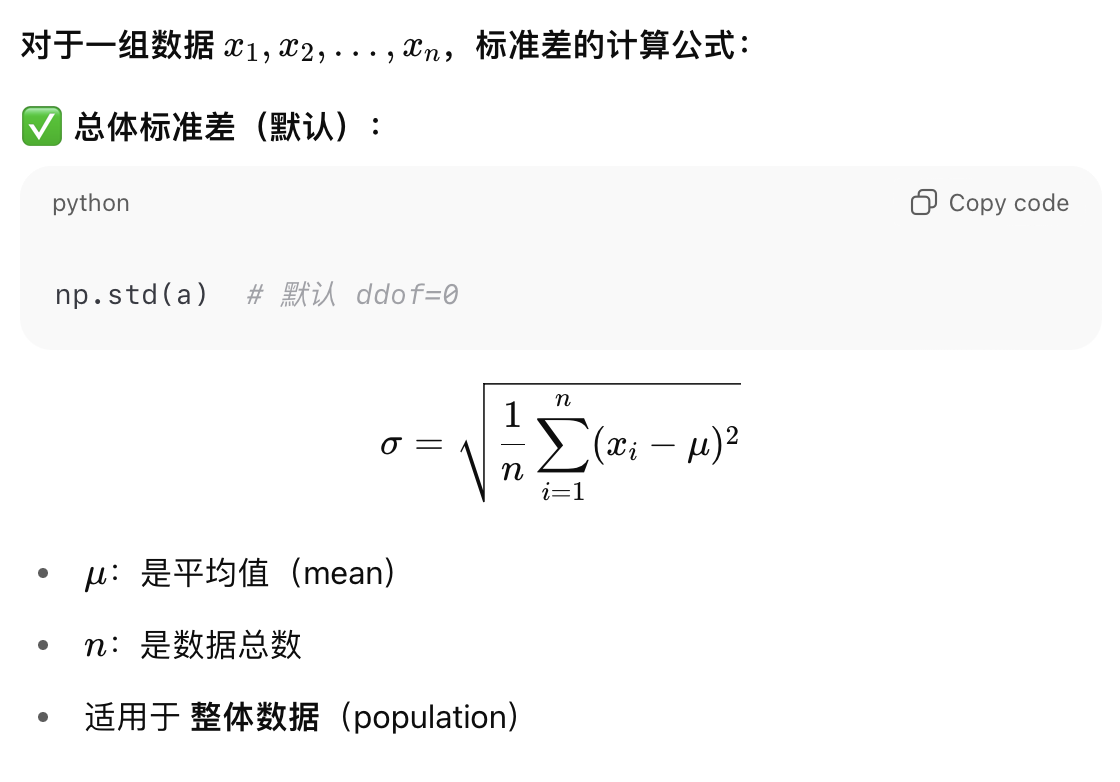

In [212]:
display(Image(filename='../photos/fomulation/std.png')) 

In [338]:
mapping_dict = {
    'POOR': 1,
    'AVG': 2,
    'BEST': 3
}
features_to_encode = ['P1', 'P2', 'P3']
X[features_to_encode] = X[features_to_encode].replace(mapping_dict)
X

,P1,P2,P3
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2
4,2,1,2
...,...,...,...
145,1,1,2
146,1,1,2
147,1,1,2
148,1,1,2


In [347]:
def std(X):
    std = np.sqrt((1/X.shape[0]) * np.sum((X - np.mean(X, axis=0)) ** 2, axis=0))
    return (X - np.mean(X, axis = 0)) / std

In [348]:
X_scaled_std = std(X)
X_scaled_std

,P1,P2,P3
0,0.707107,NaN,-0.707107
1,0.707107,NaN,-0.707107
2,0.707107,NaN,-0.707107
3,0.707107,NaN,-0.707107
4,0.707107,NaN,-0.707107
...,...,...,...
145,-1.414214,NaN,-0.707107
146,-1.414214,NaN,-0.707107
147,-1.414214,NaN,-0.707107
148,-1.414214,NaN,-0.707107


[OPT2]: SCALE DATA WITH MIN MAX BASED ON BELOW COMPARING

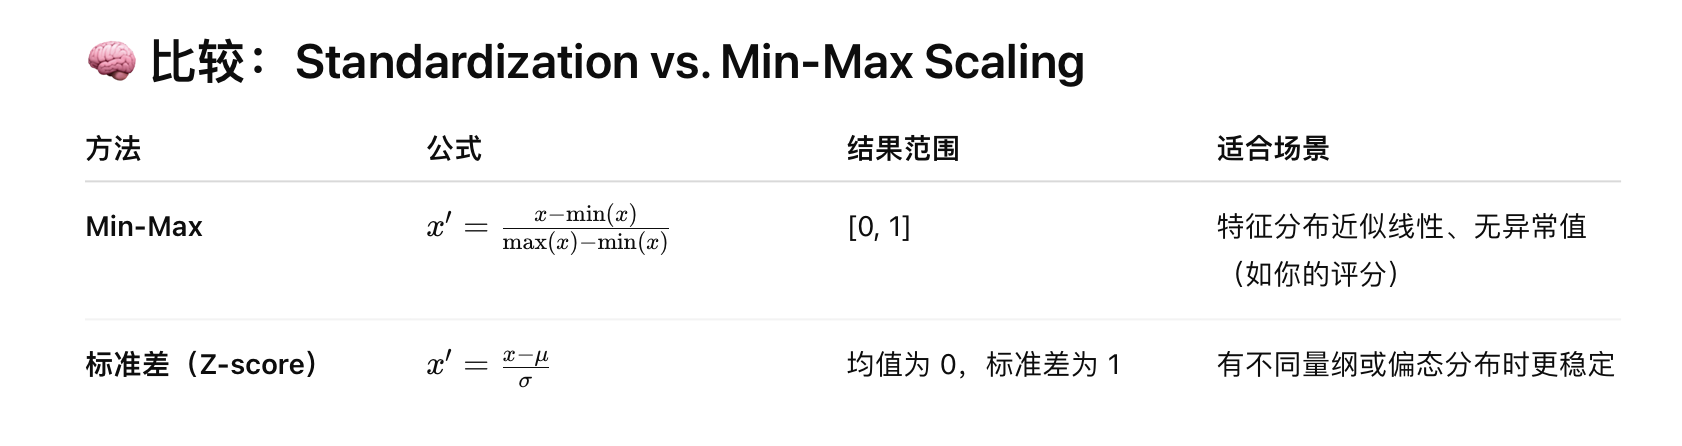

In [213]:
display(Image(filename='../photos/fomulation/compare_std_min_max_scaling.png')) 

In [278]:
mapping_dict = {
    'POOR': 1,
    'AVG': 2,
    'BEST': 3
}
features_to_encode = ['P1', 'P2', 'P3']
X[features_to_encode] = X[features_to_encode].replace(mapping_dict)
X

,P1,P2,P3
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2
4,2,1,2
...,...,...,...
145,1,1,2
146,1,1,2
147,1,1,2
148,1,1,2


In [279]:
def min_max_scale(X):
    """
    对二维数组 X 进行 Min-Max 缩放，每一列单独缩放到 [0, 1] 区间。
    参数:
        X: List[List[float]] 或 numpy.ndarray, n行m列
    返回:
        X_scaled: 同样大小的二维列表，每列值缩放到 [0, 1]
    """ 
    n_rows = len(X)
    n_cols = len(X[0])
    X_scaled = [[0.0 for _ in range(n_cols)] for _ in range(n_rows)]

    for col in range(n_cols):

        col_vals = [X[row][col] for row in range(n_rows)]
        col_min = min(col_vals)
        col_max = max(col_vals)
        range_val = col_max - col_min

        for row in range(n_rows):
            if range_val == 0:
                X_scaled[row][col] = 0.0   # 避免除以0
            else:
                X_scaled[row][col] = (X[row][col] - col_min) / range_val

    return np.array(X_scaled)



In [280]:
X_scaled = min_max_scale(X.values)
X_scaled

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

VISUALIZATION DATA

SOFTMAX REGRESSION FUNCTION

In [281]:
def softmax(Z):
    """
    计算输入数组每一列的 softmax。

    softmax 函数将原始得分(logits)转换为概率，
    通过对每一列进行指数运算并归一化实现。

    参数
    ----------
    Z : ndarray
        任意形状的 NumPy 数组。通常是一个二维数组，其中每一列
        表示一组不同类别的得分。

    返回值
    -------
    ndarray
        与 `Z` 形状相同的数组，每一列包含经过 softmax 变换后的值
        （即概率，和为 1)。

    备注
    -----
    - 此函数在 `axis=0` 方向上应用 softmax, 因此假设每一列是一个独立的得分集。
    - 如果需要在每一行上应用 softmax, 应在 `np.sum()` 中设置 `axis=1`。

    示例
    --------
    >>> Z = np.array([[1, 2, 3],
                      [1, 2, 3]])
    ...
    >>> softmax(Z)
    array([[0.5, 0.5, 0.5],
           [0.5, 0.5, 0.5]])
    """

    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [282]:
from scipy import sparse

def convert_labels(y, C):
    """
    将标签向量转换为独热编码(One-Hot Encoding)格式。

    参数
    ----------
    y : ndarray
        一维整数数组，表示类别标签。每个元素的取值应在 [0, C-1] 之间。
        例如: y = [0, 2, 1, 2]

    C : int
        总类别数(classes 的数量）。

    返回值
    -------
    Y : ndarray
        二维 NumPy 数组，形状为 (C, len(y))，每一列是 y 中对应标签的独热编码形式。
        即第 i 列是第 i 个标签的 one-hot 表示。

    示例
    --------
    >>> y = np.array([0, 2, 1])
    >>> C = 3
    >>> convert_labels(y, C)
    array([[1., 0., 0.],
           [0., 0., 1.],
           [0., 1., 0.]])

    说明
    --------
    - 使用 SciPy 的 `sparse.coo_matrix` 创建稀疏矩阵，再转换为普通 NumPy 数组。
    - 每个标签对应矩阵中的一列, one-hot 编码中对应标签的位置为 1, 其余为 0。
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

In [283]:
def cost(W, X, Y):
    """
    计算交叉熵损失(Cross-Entropy Loss)。

    该函数用于计算多类分类中的交叉熵损失，假设使用 softmax 激活函数。
    它基于模型预测值 A 和真实标签 Y 之间的差异进行计算。

    参数
    ----------
    W : ndarray
        权重矩阵，形状为 (num_features, num_classes)。

    Y : ndarray
        独热编码的真实标签矩阵，形状为 (num_classes, num_samples)。

    X : ndarray
        输入特征矩阵，形状为 (num_features, num_samples)。

    返回值
    -------
    ndarray
        损失矩阵，形状与 Y 相同，表示每个样本的逐元素交叉熵损失。
        注意：该函数**未取平均或求和**，返回的是每个元素的损失值。

    示例
    --------
    >>> W = np.random.randn(4, 3)
    >>> X = np.random.randn(4, 5)
    >>> Y = np.eye(3)[:, [0, 1, 2, 1, 0]]
    >>> cost(W, Y, X)
    array([...])  # 每个元素为 -y * log(a)

    备注
    --------
    - softmax 函数被应用于 W.T @ X 得到预测概率 A。
    - 该函数返回的是未归约（未求平均或求和）的交叉熵损失。
    - 若需计算总体损失，应加上 `.sum()` 或 `.mean()`。
    """
    A = softmax(np.dot(W.T, X))
    return -(Y * np.log(A))

GRADIENT DESCENT

In [284]:
def grad(A, X, Y):
    """
    计算 softmax 输出与真实标签之间的误差梯度，用于反向传播。

    此函数用于计算预测值 A 与真实标签 Y 之间的差值，
    并基于该误差计算梯度，以用于权重更新。

    参数
    ----------
    A : ndarray
        模型的预测概率矩阵 (softmax 输出)，形状为 (num_classes, num_samples)。

    Y : ndarray
        独热编码的真实标签矩阵，形状同 A, 为 (num_classes, num_samples)。

    返回值
    -------
    ndarray
        梯度矩阵，形状为 (num_features, num_classes),
        是输入特征 X 与误差项的乘积（注意：此函数依赖外部定义的 X)。

    示例
    --------
    >>> A = softmax(np.dot(W.T, X))
    >>> Y = one_hot_labels
    >>> grad(A, Y)
    array([...])  # 梯度值，用于更新权重

    注意事项
    --------
    - 此函数中的变量 X **未在函数内定义**，需要在函数外部预先定义。
    - E = A - Y 表示 softmax 输出与真实标签之间的误差。
    - 最终返回的是梯度: X @ E.T (注意是 X 与误差的转置相乘）。

    建议
    --------
    - 为了函数更完整与自包含，建议将 X 作为参数传入。
      如：`def grad(A, Y, X)`，避免依赖外部变量。
    """
    E = A - Y
    return np.dot(X, E.T)

SOFTMAX REFRESSION FUNCTION

In [285]:
def softmax_regression(W_init, X, Y, eta, tol=1e-4, max_count=10000):
    
    """
    使用随机梯度下降法 (SGD) 训练 Softmax 回归模型。

    该函数以随机顺序对每个样本进行迭代训练，根据 softmax + 交叉熵损失函数
    来更新权重，直到满足收敛条件或达到最大迭代次数。

    参数
    ----------
    W_init : ndarray
        初始权重矩阵，形状为 (num_features, num_classes)。

    X : ndarray
        输入特征矩阵，形状为 (num_samples, num_features)。

    Y : ndarray
        真实标签的独热编码矩阵，形状为 (num_classes, num_samples)。

    eta : float
        学习率，用于控制梯度更新的步长。

    tol : float, 可选，默认值为 1e-4
        权重更新的收敛阈值。如果连续两次相隔 30 步的权重差小于此值，则认为已收敛。

    max_count : int, 可选，默认值为 1000
        最大迭代次数（步数）。达到此值时即使未收敛也会停止训练。

    返回值
    -------
    W : list of ndarray
        权重历史列表，每一项为一个权重矩阵，记录了训练过程中的权重更新轨迹。

    说明
    -------
    - 使用随机梯度下降 (SGD) 按样本逐个更新权重。
    - 每隔 `check_w_after` 步检查一次是否收敛（使用 L2 范数）。
    - `grad(ai, xi, yi)` 需为一个能返回梯度的函数，接受 softmax 输出、样本特征 xi 和标签 yi。
    - 输入的 X 是按样本为行，特征为列的格式，因此 `X[i, :]` 是第 i 个样本。

    示例
    --------
    >>> W_init = np.zeros((4, 3))
    >>> X = np.random.randn(100, 4)
    >>> Y = one_hot_encode(labels, num_classes=3)  # 形状为 (3, 100)
    >>> W_list = softmax_regression(W_init, X, Y, eta=0.01)
    >>> final_W = W_list[-1]
    """

    W = [W_init]
    N = X.shape[0]
    C = W_init.shape[1]

    loss_history = [0]

    batch_size = 20

    # b = np.zeros((1, C)) # Vector bias, shape (1, C)

    count = 0
    check_w_after = 30

    while count < max_count:

        ids_mixed = np.random.permutation(N)

        for i in range(0, N, batch_size):

            batch_ids = ids_mixed[i: i + batch_size]
            
            x_batch = X[batch_ids, :]
            y_batch = Y[:, batch_ids]
            z_batch = np.dot(W[-1].T, x_batch.T)
            a_batch = softmax(z_batch) 

            grad_dW = grad(a_batch, x_batch.T, y_batch) / batch_size
            # grad_db = np.sum(a_batch - y_batch, axis=0, keepdims=True) / batch_size 

            W_new = W[-1] - eta * grad_dW
            # b_new = b - eta * grad_db.T

            if count % check_w_after == 0:
                if (np.linalg.norm(W_new - W[-1])) < tol and (loss_history[-1] - np.log(1/C) < tol):
                    return W, loss_history

            W.append(W_new)
            # b = b_new
        
        Z_all = np.dot(X, W[-1])
        a_all = softmax(Z_all)
        cost = -np.sum(Y.T * np.log(np.clip(a_all, 1e-10, 1.0 - 1e-10)))
        loss_history.append(cost)

        count += 1
        

    return W, loss_history

In [286]:
def numerical_grad(X, Y, W, cost):
    """
    计算损失函数对权重矩阵 W 的数值梯度。

    本函数使用中心差分法 (central difference method) 近似计算梯度：
    ∂J/∂W[i,j] ≈ (J(W+ε) - J(W-ε)) / (2ε)

    参数
    ----------
    X : np.ndarray
        输入数据矩阵，形状为 (d, n)，其中 `d` 是特征维度，`n` 是样本数量。
    Y : np.ndarray
        真实标签或目标值，具体形状依赖于损失函数的定义。
    W : np.ndarray
        权重矩阵，形状为 (m, d)，其中 `m` 通常为输出类别数。
    cost : callable
        损失函数，接受参数 (X, Y, W) 并返回一个标量损失值。

    返回值
    -------
    g : np.ndarray
        数值梯度矩阵，形状与 W 相同，其中 g[i, j] 近似表示 ∂(cost)/∂W[i, j]。

    注意事项
    -----
    - 数值梯度计算开销较大，建议仅用于梯度检查或调试，**不适合训练过程使用**。
    - 使用中心差分法（比单边差分更准确）来提高数值稳定性。

    示例
    -------
    >>> def simple_cost(X, Y, W):
    ...     predictions = W @ X
    ...     return np.sum((predictions - Y)**2)
    >>> X = np.random.randn(2, 5)
    >>> Y = np.random.randn(3, 5)
    >>> W = np.random.randn(3, 2)
    >>> grad = numerical_grad(X, Y, W, simple_cost)
    >>> grad.shape
    (3, 2)
    """
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

In [287]:
def cost(X, Y, W):
    """
    计算多类别分类任务中的交叉熵损失函数(cross-entropy loss)。

    此函数假设模型输出为 softmax 层，适用于多分类问题中的损失计算。
    给定输入 X, 标签 Y, 和权重矩阵 W, 返回整体的交叉熵损失。

    参数
    ----------
    X : np.ndarray
        输入特征矩阵，形状为 (d, n)，其中 d 是特征数, n 是样本数量。
    Y : np.ndarray
        真实标签的 one-hot 编码矩阵，形状为 (C, n), C 是类别数。
    W : np.ndarray
        权重矩阵，形状为 (d, C)，用于将输入特征映射到 C 个类别。

    返回值
    -------
    loss : float
        整体交叉熵损失（一个标量），衡量预测分布与真实分布之间的差异。

    数学表达
    --------
    给定 softmax 输出 A:
        A = softmax(WᵗX)  
    损失函数定义为：
        L = -∑ Y * log(A)
    其中：
        - Y 为 one-hot 编码标签
        - A 为 softmax 输出，每列为一个样本对各类别的预测概率

    注意事项
    --------
    - 假设输入 Y 是 one-hot 编码。
    - 为了避免数值不稳定，实际使用时可加上 ε 平滑项：`np.log(A + 1e-10)`。
    """
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

GO FOR CHECK PROGRAMMING RESULT

In [288]:
C = len(unique_jobs) #class based on Y
Y = convert_labels(y_encoded, C)
Y.shape, Y

((3, 150),
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0

In [357]:
d = X_encoded.shape[1] #features based on X
W_init = np.random.randn(d, C) * np.sqrt(2. / d)
W_init.shape, np.array(X_encoded).T.shape, Y.shape
W_init

array([[ 0.88627031, -0.38733642,  0.87746245],
       [ 0.73983412, -0.03818015, -0.80369427],
       [-0.14413971,  0.90162217, -0.34941391],
       [-0.32130492,  0.28836927, -0.61006509],
       [ 0.3309827 , -0.33877507, -0.18087707]])

CHECKING TRAINED DATA

In [241]:
g1 = grad(softmax(np.dot(W_init.T, np.array(X_encoded).T)), np.array(X_encoded).T, Y)
g2 = numerical_grad(np.array(X_encoded).T, Y, W_init, cost)

In [242]:
gap = np.linalg.norm(g1 - g2)
gap

5.5347957589025636e-08

START TO TRAIN

In [365]:
W, losses = softmax_regression(W[-1], np.array(X_encoded), Y, 0.001, max_count=100000)

In [366]:
W[-1], losses[-1]

(array([[ 3.90980473,  1.0260188 , -3.55942719],
        [-3.28357828, -1.25602308,  4.43756107],
        [-1.14401769,  1.09713446,  0.45495178],
        [ 2.72694485, -4.31271344,  0.94276786],
        [-3.71714505,  4.45781993, -0.92934432]]),
 586.9483466710376)

STORED WEIGHT MATRIX

In [331]:
with open('output.txt', 'w') as f:
    f.write(str(W[-1]))

ACCURACY PERFORMANCE

In [368]:
result = []
maxes = []
for x in np.array(X_encoded):
    a = softmax(np.dot(W[-1].T, x.reshape(d,1)))
    result.append(np.argmax(a, axis=0)[0])
result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [418]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(result, y_encoded)
accuracy = accuracy * 100 
accuracy

100.0

PREDICTION

In [374]:
def map_to_qualitative(value):
    if 0 <= value <= 10:
        return 'POOR'
    elif 11 <= value <= 14:
        return 'AVG'
    elif value >= 15:
        return 'BEST'
    else:
        return 'NA'

In [383]:
def parse_X_predict(X_array):
    result = [map_to_qualitative(value) for value in X_array]
    return np.array(result)

In [434]:
X_predict = [1, 1, 12]
X_predict_label = parse_X_predict(X_predict)
X_predict_df = pd.DataFrame([X_predict_label], columns=cols_to_encode)
X_predict_encode = one_hot_encode(X_predict_df, cols_to_encode, valid_categories)
X_predict_encode

,P1_POOR,P2_POOR,P3_AVG
0,1,1,1


In [435]:
train_cols = X_encoded.columns.to_list()
input_cols = X_predict_encode.columns.to_list()
input_values = X_predict_encode.iloc[0].values

df_transformed_input = pd.DataFrame(np.zeros((1, len(train_cols))), columns=train_cols)

for col, val in zip(input_cols, input_values):
    if val == 1 and col in df_transformed_input:
        df_transformed_input[col] = val

df_transformed_input

,P1_AVG,P1_POOR,P2_POOR,P3_AVG,P3_BEST
0,0.0,1,1,1,0.0


In [436]:
prods = softmax(np.dot(W[-1].T, df_transformed_input.T))
prods

array([[5.33261504e-04],
       [3.33834741e-05],
       [9.99433355e-01]])

In [437]:
y_predict = np.argmax(prods, axis=0)[0]
unique_jobs[y_predict]


'Marine Biologist\n'